In [2]:
FILE_PATH = '/kaggle/input/titanic/01_preprocessing_data.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv(FILE_PATH)

In [5]:
df.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S


In [6]:
df.drop(columns={'Unnamed: 0'},inplace = True)

In [168]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S


In [170]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [171]:
df.dropna(inplace=True)

In [172]:
df['Age'] = np.ceil(df['Age']).astype(int)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


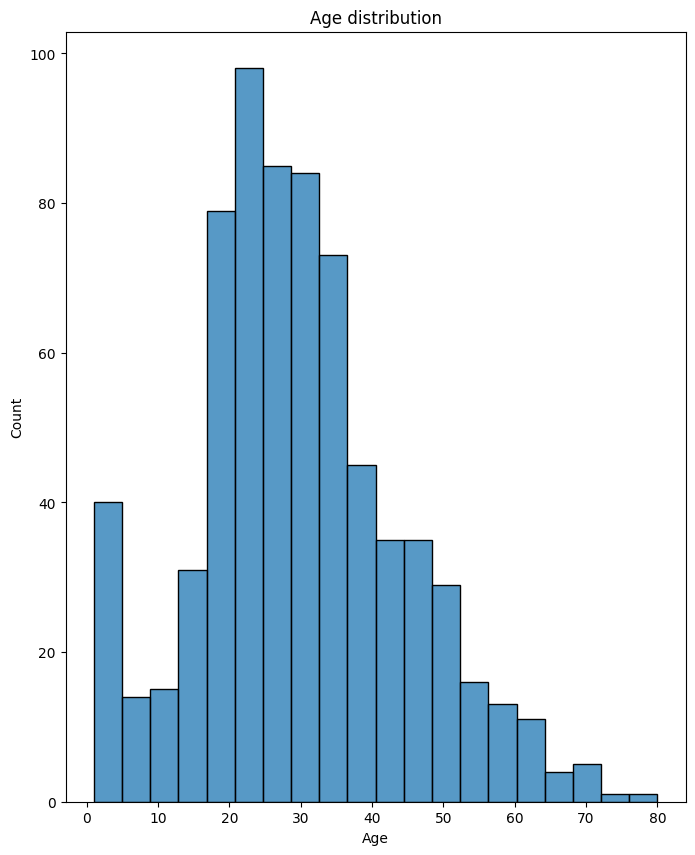

In [181]:
plt.figure(figsize=(8, 10))
sns.histplot(
    x=df['Age'],  
)
plt.title('Age distribution')
plt.show()


In [174]:
age_Survived = df[(df['Survived'] == 1)]['Age'].value_counts()
age_Survived

Age
24    15
1     12
22    11
35    11
27    11
36    11
30    10
18     9
32     9
19     9
29     8
31     8
33     7
4      7
28     7
17     6
25     6
16     6
40     6
42     6
34     6
48     6
26     6
38     5
39     5
50     5
45     5
23     5
21     5
3      5
15     4
5      4
49     4
2      3
54     3
14     3
52     3
58     3
44     3
20     3
63     2
56     2
41     2
60     2
9      2
13     2
8      2
51     2
62     2
6      2
43     1
11     1
12     1
80     1
53     1
7      1
55     1
37     1
47     1
Name: count, dtype: int64

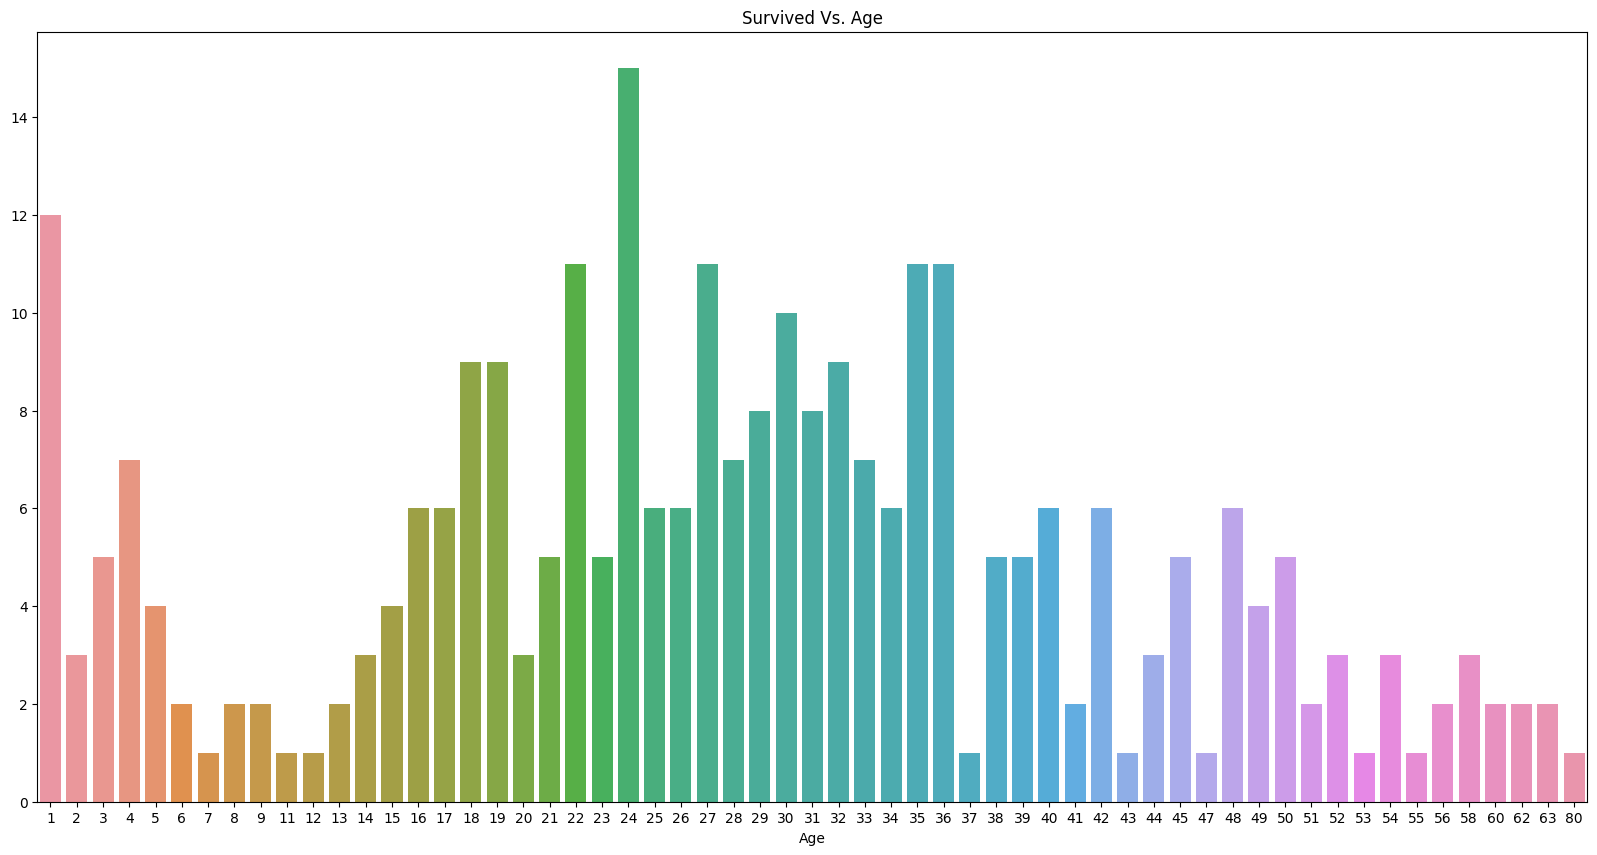

In [177]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x=age_Survived.index,  
    y=age_Survived.values,
)
plt.title('Survived Vs. Age')
plt.show()


In [178]:
age_notsurvived = df[(df['Survived'] == 0)]['Age'].value_counts()
age_notsurvived

Age
21    20
25    18
28    18
18    17
22    16
      ..
3      1
55     1
66     1
6      1
74     1
Name: count, Length: 64, dtype: int64

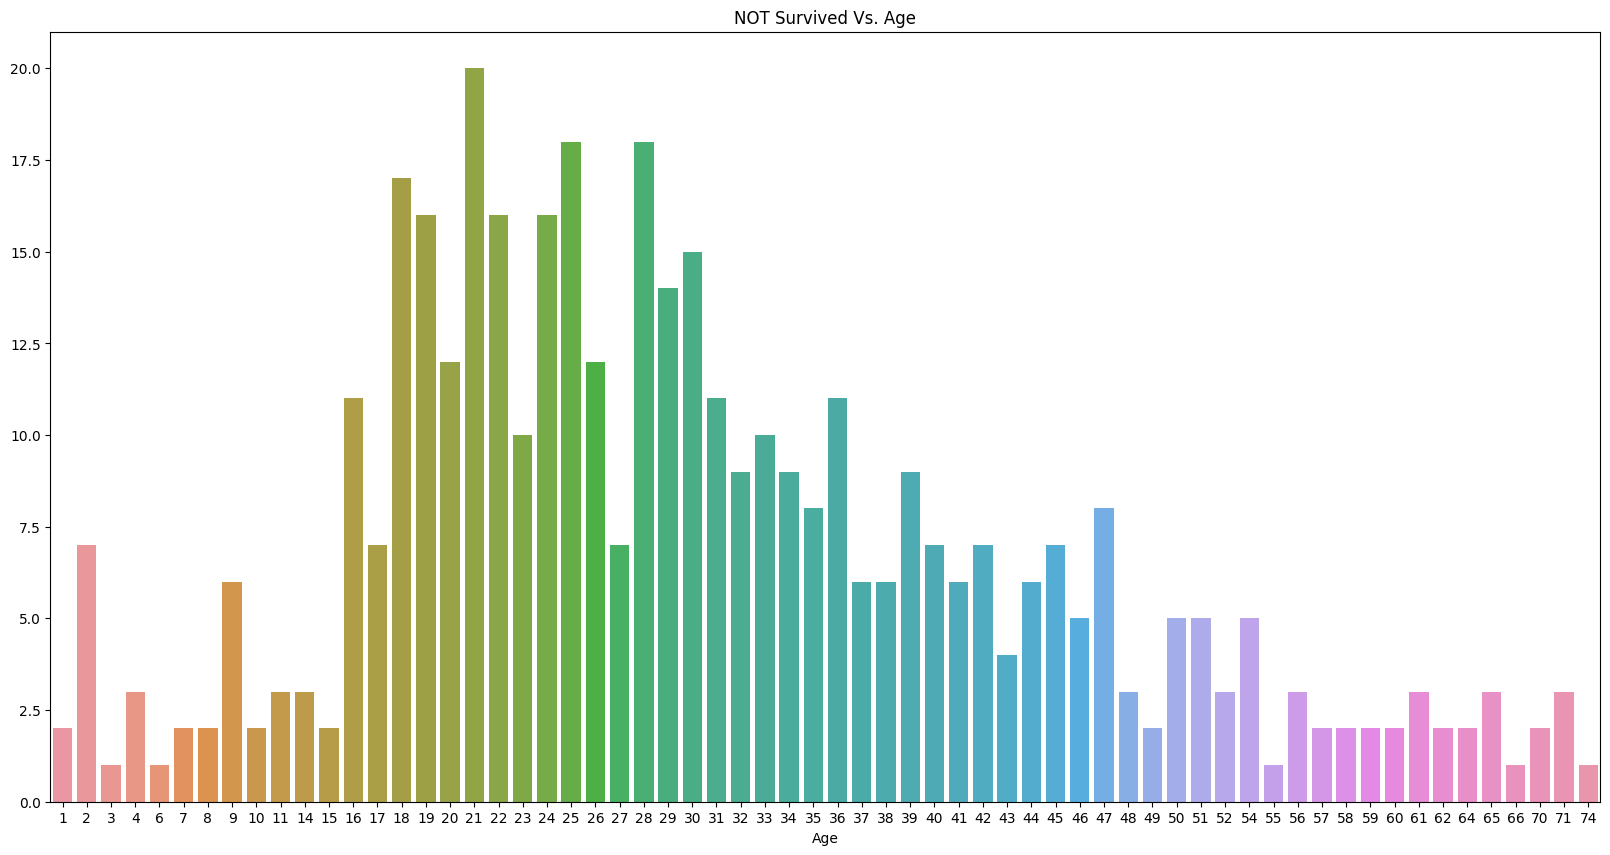

In [179]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x=age_notsurvived.index,  
    y=age_notsurvived.values,
)
plt.title('NOT Survived Vs. Age')
plt.show()


In [68]:
ticket_class1 = df[(df['Pclass'] == 1)]['Survived'].value_counts()
ticket_class1

array([136,  80])

In [30]:
ticket_class1_survived = df[(df['Pclass'] == 1)]['Pclass'].count()
ticket_class1_survived

216

In [13]:
ticket_class1_survived = df[(df['Pclass'] == 1) & (df['Survived'] == 1)]['Pclass'].count()
ticket_class1_survived

136

In [23]:
ticket_class1_notsurvived = df[(df['Pclass'] == 1) & (df['Survived'] == 0)]['Pclass'].count()
ticket_class1_notsurvived

80

Text(0.5, 1.0, 'Survived in Class 1')

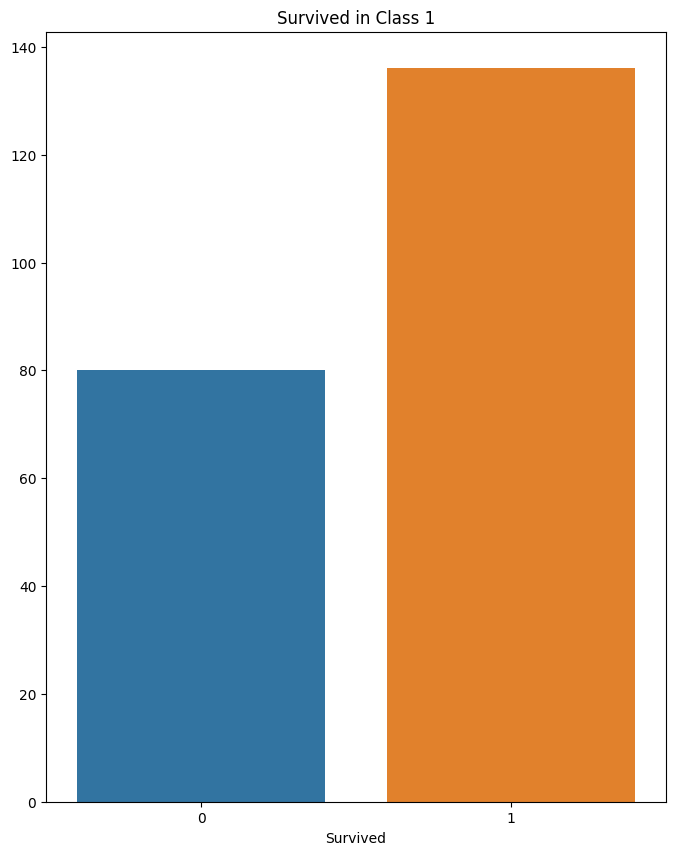

In [73]:
plt.figure(figsize=(8,10))
sns.barplot(
x=ticket_class1.index,
y=ticket_class1.values
)
plt.title('Survived in Class 1')

In [74]:
ticket_class2 = df[(df['Pclass'] == 2)]['Survived'].value_counts()
ticket_class2

Survived
0    97
1    87
Name: count, dtype: int64

In [19]:
ticket_class2_survived = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]['Pclass'].count()
ticket_class2_survived

87

In [75]:
ticket_class2_notsurvived = df[(df['Pclass'] == 2) & (df['Survived'] == 0)]['Pclass'].count()
ticket_class2_notsurvived

97

Text(0.5, 1.0, 'Survived in Class 2')

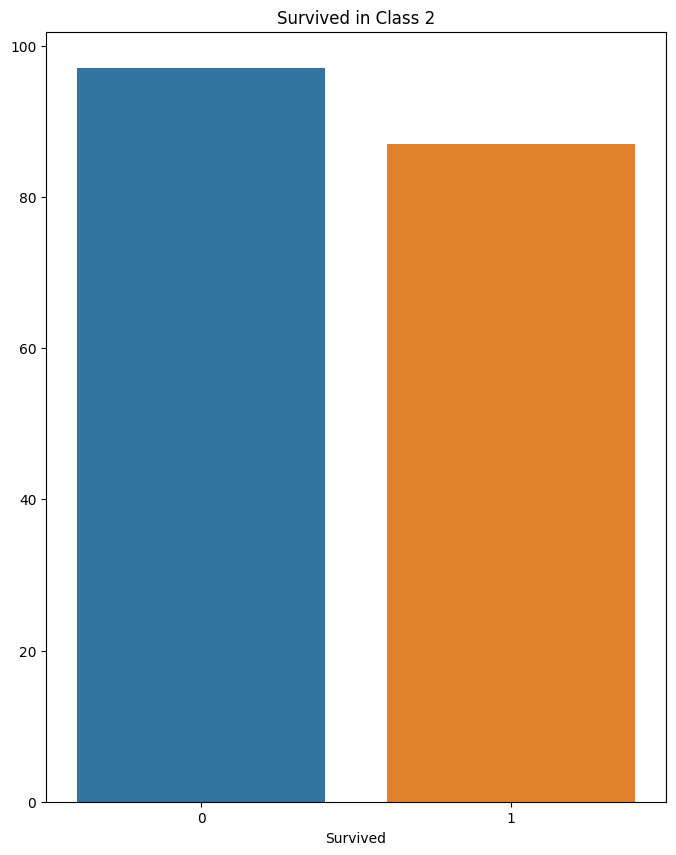

In [77]:
plt.figure(figsize=(8,10))
sns.barplot(
x=ticket_class2.index,
y=ticket_class2.values
)
plt.title('Survived in Class 2')

In [79]:
ticket_class3 = df[(df['Pclass'] == 3)]['Survived'].value_counts()
ticket_class3

Survived
0    372
1    119
Name: count, dtype: int64

In [17]:
ticket_class3_survived = df[(df['Pclass'] == 3) & (df['Survived'] == 1)]['Pclass'].count()
ticket_class3_survived

119

In [18]:
ticket_class3_notsurvived = df[(df['Pclass'] == 3) & (df['Survived'] == 0)]['Pclass'].count()
ticket_class3_notsurvived

372

Text(0.5, 1.0, 'Survived in Class 3')

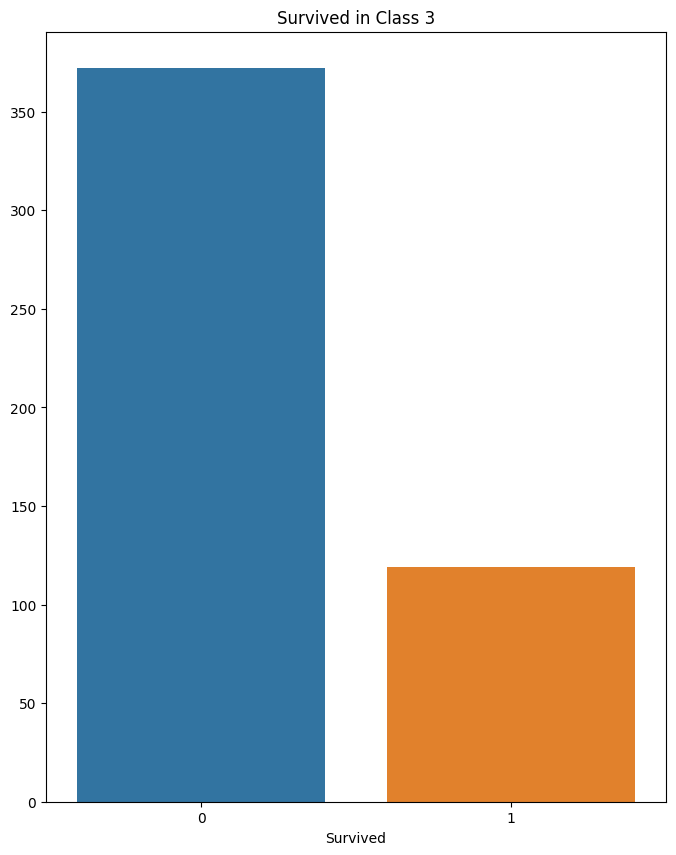

In [132]:
plt.figure(figsize=(8,10))
sns.barplot(
x=ticket_class3.index,
y=ticket_class3.values
)
plt.title('Survived in Class 3')

In [134]:
gender_survived = df[(df['Survived'] == 1)]['Sex'].value_counts()
gender_survived

Sex
female    233
male      109
Name: count, dtype: int64

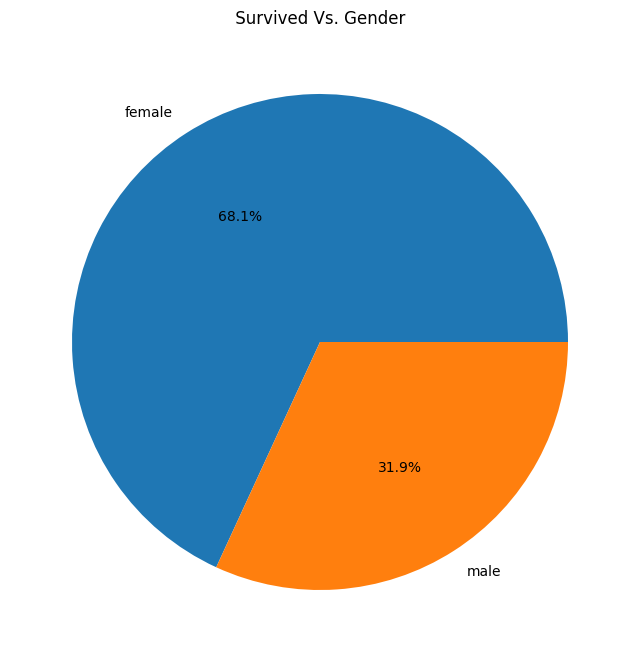

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
plt.pie(
    x=gender_survived.values,
    labels=gender_survived.index,
    autopct='%1.1f%%',
)

plt.title(' Survived Vs. Gender ')
plt.show()

In [90]:
gender_class1 = df[(df['Pclass'] == 1)]['Sex'].value_counts()
gender_class1

Sex
male      122
female     94
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender in Class 1')

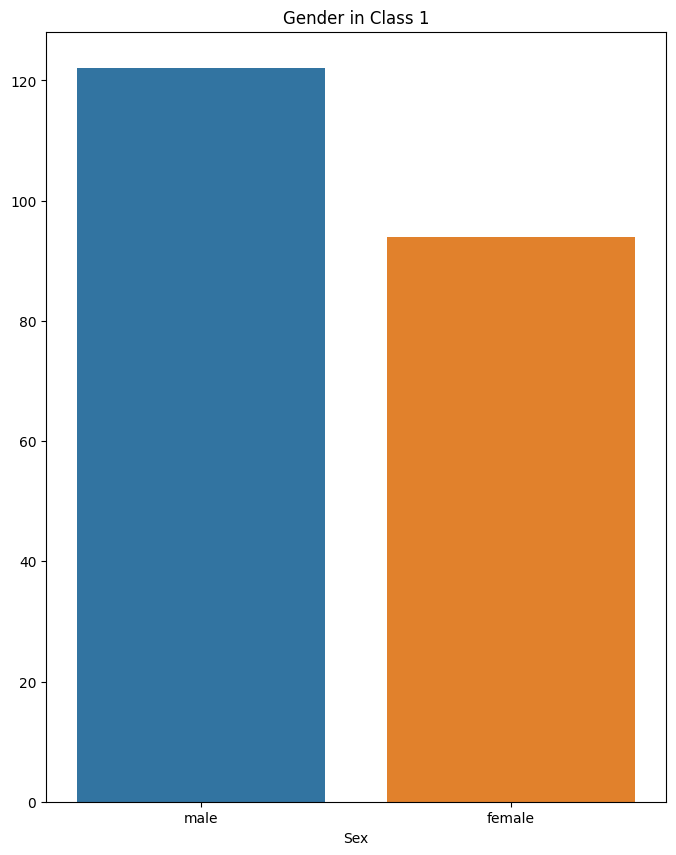

In [91]:
plt.figure(figsize=(8,10))
sns.barplot(
x=gender_class1.index,
y=gender_class1.values
)
plt.title('Gender in Class 1')

In [92]:
gender_class1_survived = df[(df['Pclass'] == 1) & (df['Survived'] == 1)]['Sex'].value_counts()
gender_class1_survived

Sex
female    91
male      45
Name: count, dtype: int64

Text(0.5, 1.0, 'Survived Vs. Gender in Class 1')

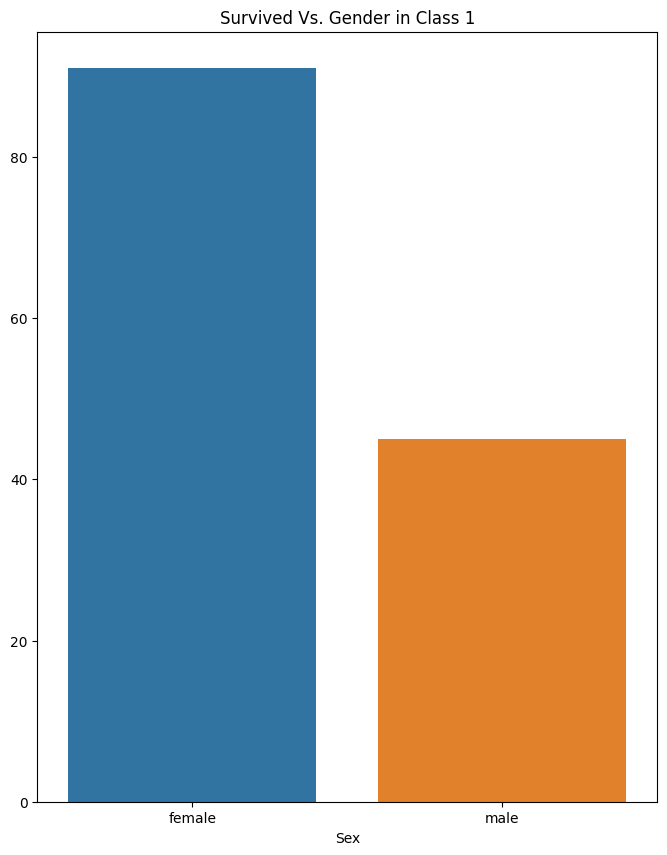

In [95]:
plt.figure(figsize=(8,10))
sns.barplot(
x=gender_class1_survived.index,
y=gender_class1_survived.values
)
plt.title('Survived Vs. Gender in Class 1')

In [97]:
gender_class1_notsurvived = df[(df['Pclass'] == 1) & (df['Survived'] == 0)]['Sex'].value_counts()
gender_class1_notsurvived

Sex
male      77
female     3
Name: count, dtype: int64

Text(0.5, 1.0, 'NOT Survived Vs. Gender in Class 1')

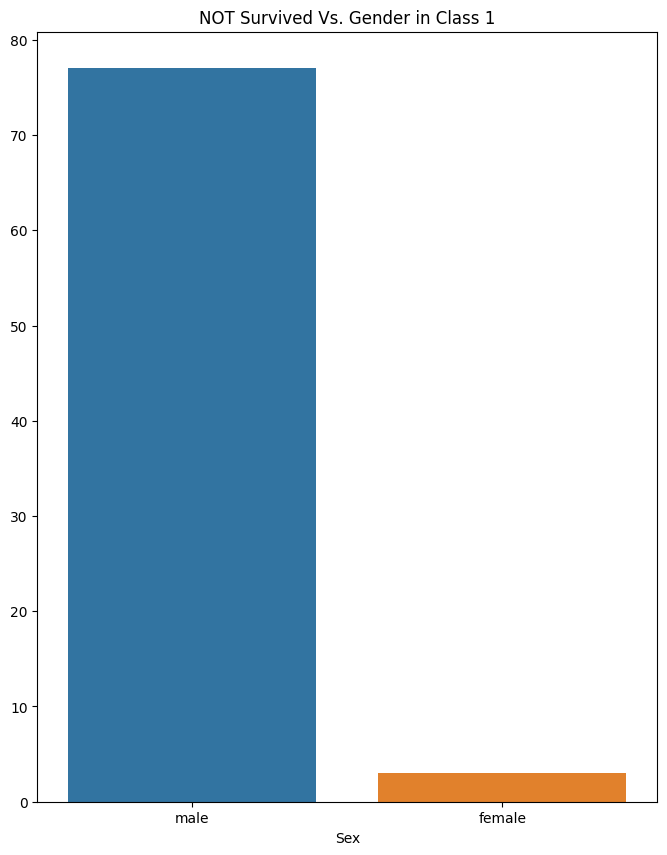

In [100]:
plt.figure(figsize=(8,10))
sns.barplot(
x=gender_class1_notsurvived.index,
y=gender_class1_notsurvived.values
)
plt.title('NOT Survived Vs. Gender in Class 1')

In [102]:
gender_class2_survived = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]['Sex'].value_counts()
gender_class2_survived

Sex
female    70
male      17
Name: count, dtype: int64

Text(0.5, 1.0, 'Survived Vs. Gender in Class 2')

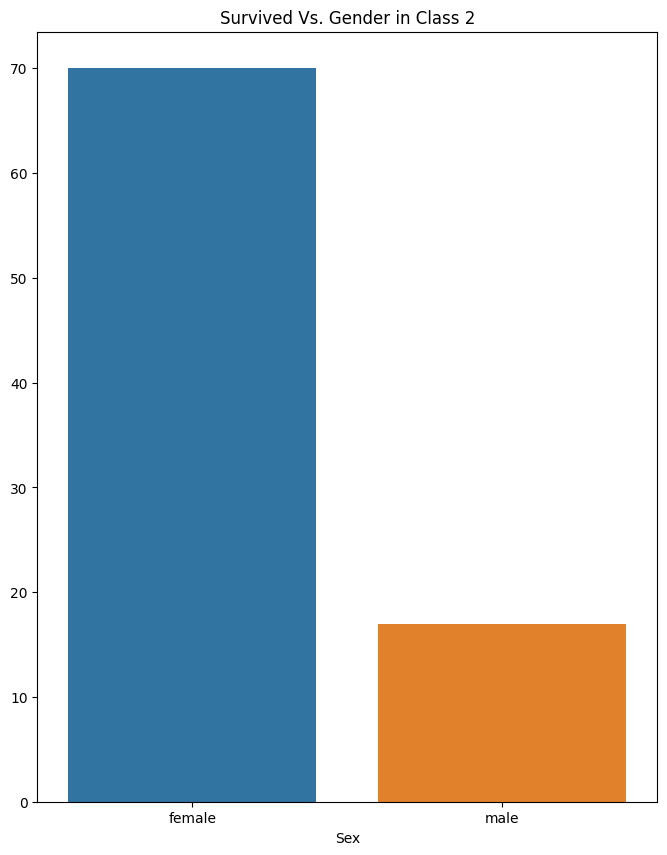

In [105]:
plt.figure(figsize=(8,10))
sns.barplot(
x=gender_class2_survived.index,
y=gender_class2_survived.values
)
plt.title('Survived Vs. Gender in Class 2')

In [106]:
gender_class2_notsurvived = df[(df['Pclass'] == 2) & (df['Survived'] == 0)]['Sex'].value_counts()
gender_class2_notsurvived

Sex
male      91
female     6
Name: count, dtype: int64

Text(0.5, 1.0, 'NOT Survived Vs. Gender in Class 2')

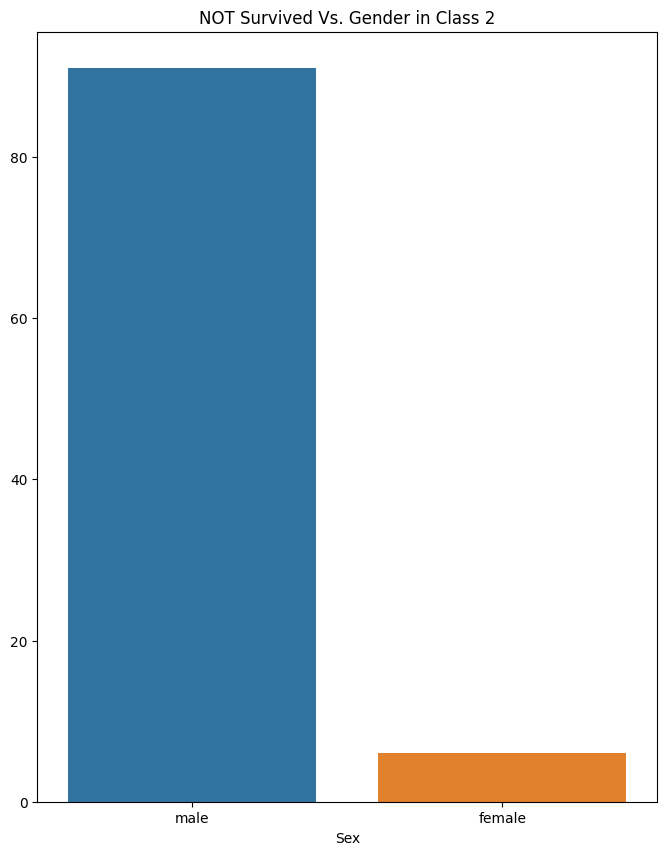

In [108]:
plt.figure(figsize=(8,10))
sns.barplot(
x=gender_class2_notsurvived.index,
y=gender_class2_notsurvived.values
)
plt.title('NOT Survived Vs. Gender in Class 2')

In [110]:
gender_class3_survived = df[(df['Pclass'] == 3) & (df['Survived'] == 1)]['Sex'].value_counts()
gender_class3_survived

Sex
female    72
male      47
Name: count, dtype: int64

Text(0.5, 1.0, 'Survived Vs. Gender in Class 3')

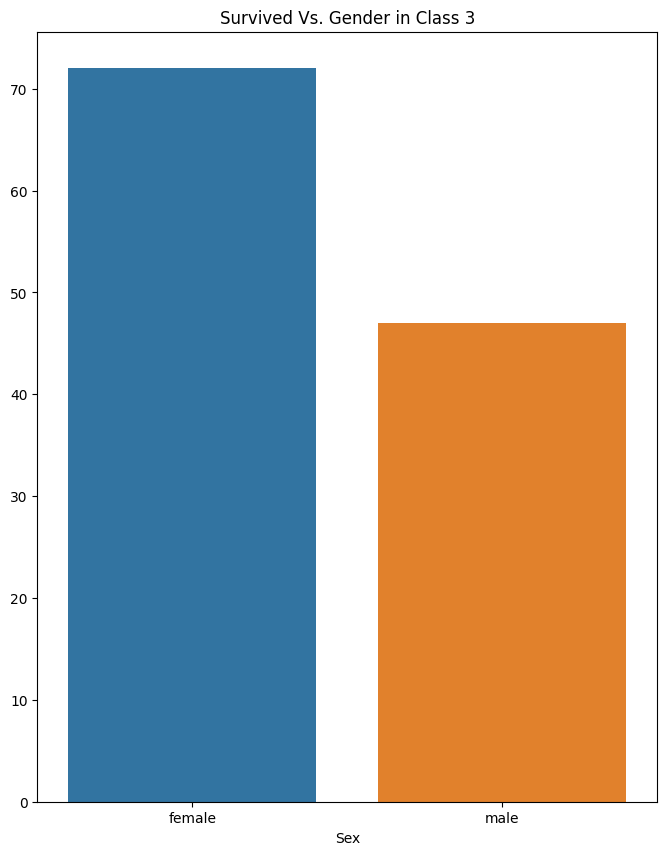

In [113]:
plt.figure(figsize=(8,10))
sns.barplot(
x=gender_class3_survived.index,
y=gender_class3_survived.values
)
plt.title('Survived Vs. Gender in Class 3')

In [114]:
gender_class3_notsurvived = df[(df['Pclass'] == 3) & (df['Survived'] == 0)]['Sex'].value_counts()
gender_class3_notsurvived

Sex
male      300
female     72
Name: count, dtype: int64

Text(0.5, 1.0, 'NOT Survived Vs. Gender in Class 3')

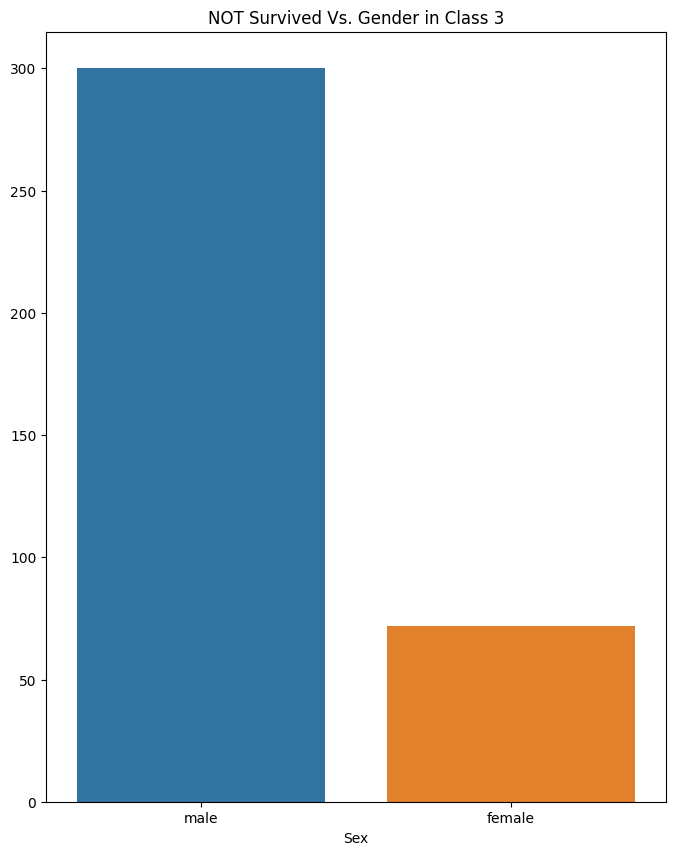

In [118]:
plt.figure(figsize=(8,10))
sns.barplot(
x=gender_class3_notsurvived.index,
y=gender_class3_notsurvived.values
)
plt.title('NOT Survived Vs. Gender in Class 3')

In [184]:
gender_sibsp_survived = df[(df['Survived'] == 1) & (df['SibSp'] > 0)]['Sex'].value_counts()
gender_sibsp_survived

Sex
female    82
male      33
Name: count, dtype: int64

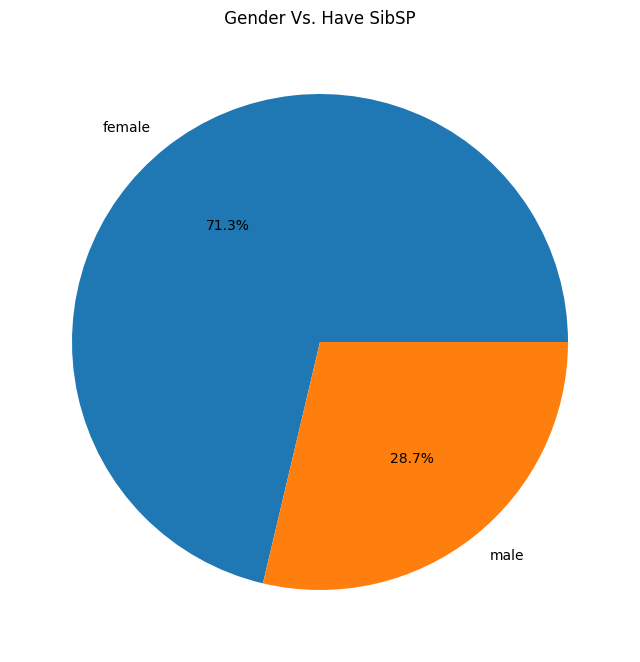

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
plt.pie(
    x=gender_sibsp_survived.values,
    labels=gender_sibsp_survived.index,
    autopct='%1.1f%%',
)

plt.title(' Gender Vs. Have SibSP ')
plt.show()

In [187]:
gender_sibsp_notsurvived = df[(df['Survived'] == 0) & (df['SibSp'] > 0)]['Sex'].value_counts()
gender_sibsp_notsurvived

Sex
male      93
female    35
Name: count, dtype: int64

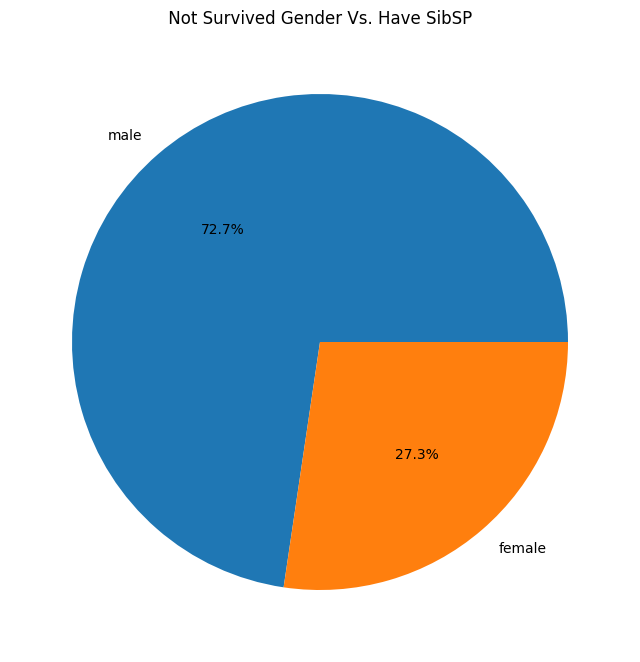

In [198]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
plt.pie(
    x=gender_sibsp_notsurvived.values,
    labels=gender_sibsp_notsurvived.index,
    autopct='%1.1f%%',
)

plt.title(' Not Survived Gender Vs. Have SibSP ')
plt.show() 

In [193]:
gender_notsibsp_survived = df[(df['Survived'] == 1) & (df['SibSp'] == 0)]['Sex'].value_counts()
gender_notsibsp_survived

Sex
female    115
male       60
Name: count, dtype: int64

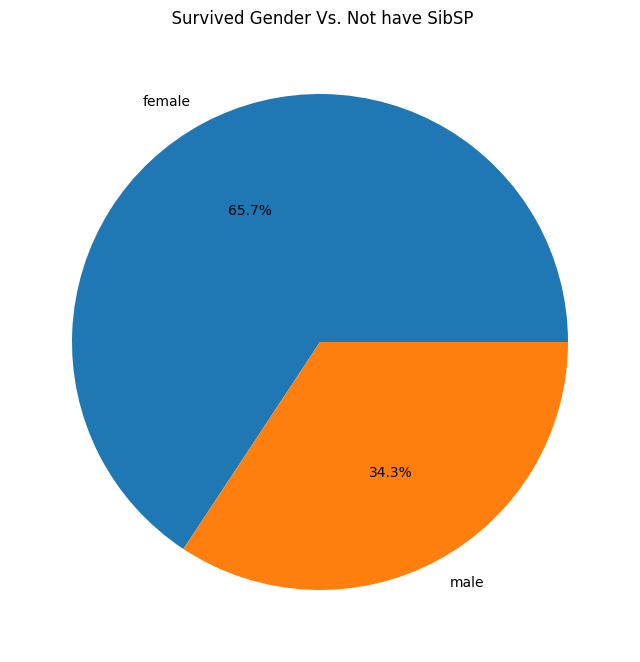

In [196]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
plt.pie(
    x=gender_notsibsp_survived.values,
    labels=gender_notsibsp_survived.index,
    autopct='%1.1f%%',
)

plt.title('  Survived Gender Vs. Not have SibSP ')
plt.show() 

In [200]:
gender_notsibsp_notsurvived = df[(df['Survived'] == 0) & (df['SibSp'] == 0)]['Sex'].value_counts()
gender_notsibsp_notsurvived

Sex
male      267
female     29
Name: count, dtype: int64

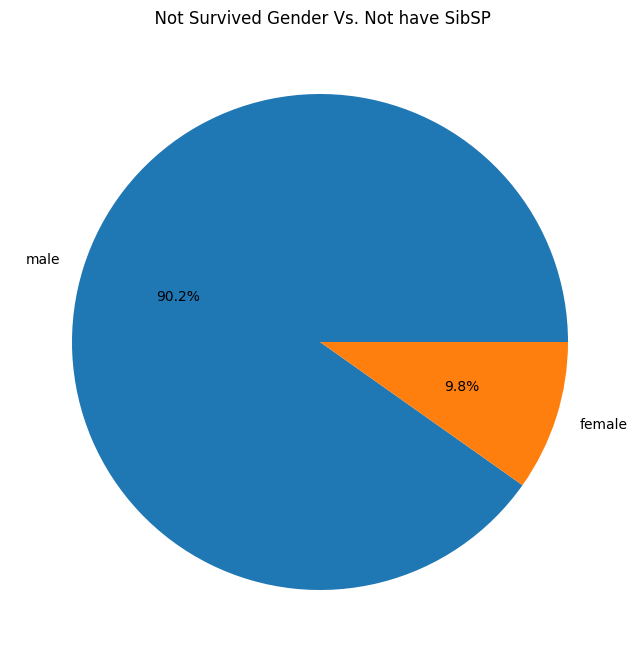

In [203]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
plt.pie(
    x=gender_notsibsp_notsurvived.values,
    labels=gender_notsibsp_notsurvived.index,
    autopct='%1.1f%%',
)

plt.title('  Not Survived Gender Vs. Not have SibSP ')
plt.show() 

In [205]:
ticket_class1_Fare = df[(df['Pclass'] == 1)]['Fare'].sum()
ticket_class1_Fare

16360.854299999999

In [207]:
ticket_class2_Fare = df[(df['Pclass'] == 2)]['Fare'].sum()
ticket_class2_Fare

3714.5792

In [214]:
ticket_class3_Fare = df[(df['Pclass'] == 3)]['Fare'].sum()
ticket_class3_Fare

4696.4495

In [242]:
ticket_fare_counts = df.groupby('Pclass')['Fare'].sum()
ticket_fare_counts

Pclass
1    16360.8543
2     3714.5792
3     4696.4495
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Pclass Vs. Fare')

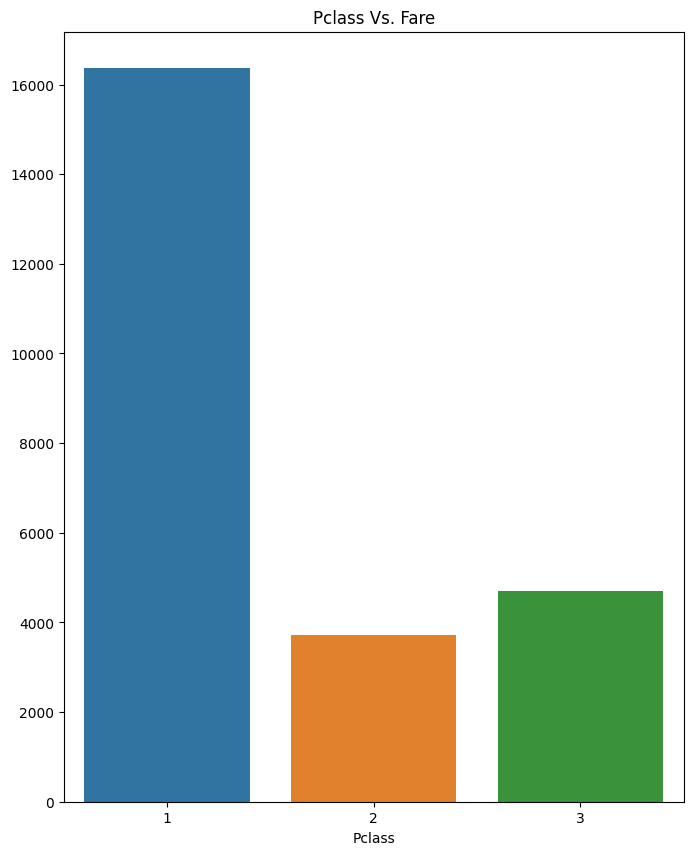

In [248]:
plt.figure(figsize=(8,10))
sns.barplot(
x=ticket_fare_counts.index,
y=ticket_fare_counts.values,
)
plt.title('Pclass Vs. Fare')

In [246]:
ticket_fare_counts_embarked = df.groupby('Embarked')['Fare'].sum()
ticket_fare_counts_embarked

Embarked
C     8878.5797
Q      511.4417
S    15381.8616
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Embarked Vs. Fare')

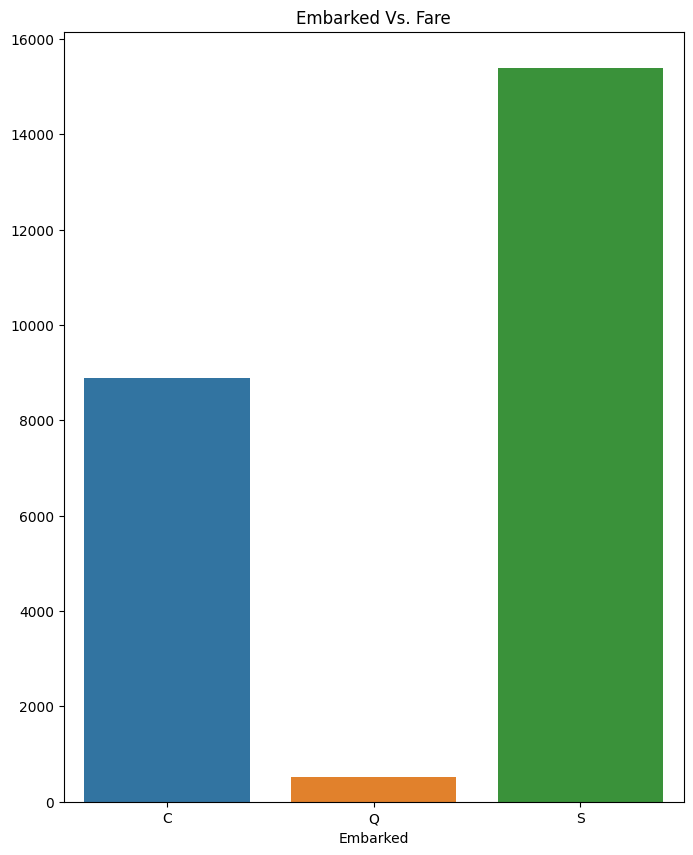

In [247]:
plt.figure(figsize=(8,10))
sns.barplot(
x=ticket_fare_counts_embarked.index,
y=ticket_fare_counts_embarked.values,
)
plt.title('Embarked Vs. Fare')